In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import io
from google.colab import files
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [0]:

uploaded = files.upload()


Saving Iris_Dataset.csv to Iris_Dataset.csv
Saving dane_linkedin_header.csv to dane_linkedin_header.csv


# Zadanie 1

In [0]:

dataset = pd.read_csv('Iris_Dataset.csv')
dataset = pd.get_dummies(dataset, columns=['Species']) 
values = list(dataset.columns.values)
dataset.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0


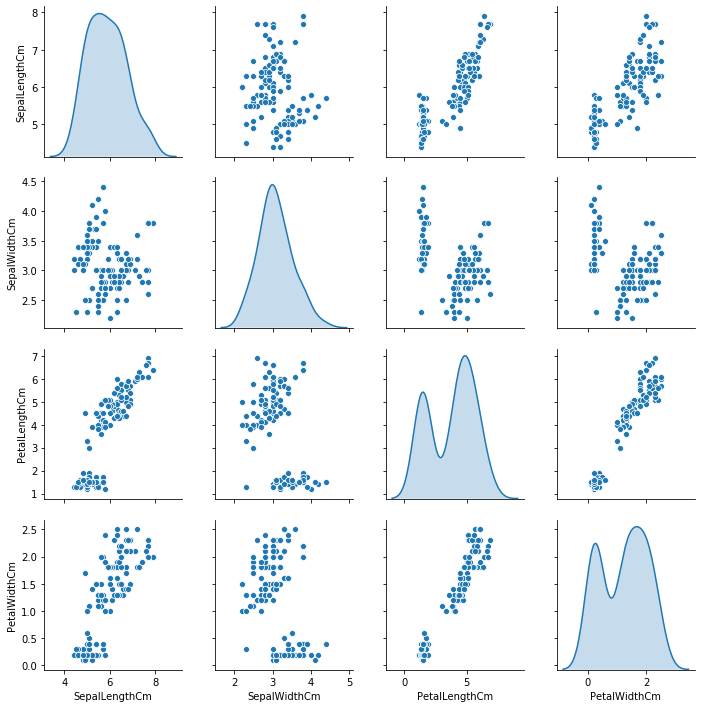

In [0]:
train_dataset = dataset.sample(frac=0.8,random_state=1)
test_dataset = dataset.drop(train_dataset.index)

sns.pairplot(train_dataset[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]], diag_kind="kde")



In [0]:
normed_train_data = train_dataset[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
train_labels = train_dataset[['Species_Iris-setosa',	'Species_Iris-versicolor',	'Species_Iris-virginica']]


normed_test_data = test_dataset[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
test_labels =  test_dataset[['Species_Iris-setosa',	'Species_Iris-versicolor',	'Species_Iris-virginica']]


In [0]:
model1 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(normed_train_data.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(3)
  ])

model1.compile(loss='mse',
                optimizer=tf.keras.optimizers.RMSprop(0.001),
                metrics=['accuracy', 'mse'])
  
model2 = keras.Sequential([
    layers.Dense(128, activation='sigmoid', input_shape=[len(normed_train_data.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(3)
  ])

model2.compile(loss='mse',
                optimizer=tf.keras.optimizers.RMSprop(0.001),
                metrics=['accuracy', 'mse'])
  
model3 = keras.Sequential([
    layers.Dense(256, activation='selu', input_shape=[len(normed_train_data.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(3)
  ])
model3.compile(loss='mse',
                optimizer=tf.keras.optimizers.RMSprop(0.001),
                metrics=['accuracy', 'mse'])
  

In [0]:

model1.summary()
model2.summary()
model3.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_37 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_38 (Dense)             (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 128)               640       
_________________________________________________________________
dense_40 (Dense)             (None, 64)                8256      
____________________________

In [0]:
EPOCHS = 500

history1 = model1.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0)

history2 = model2.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0)

history3 = model3.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0)

In [0]:
def modelAcuracy(model):
    test_loss1, test_acc1, mse = model.evaluate(normed_test_data, test_labels, verbose=2)
    print('Test accuracy for model:', test_acc1)

In [0]:
print('Accuracy for model 1')
modelAcuracy(model1)
print('\nAccuracy for model 2')
modelAcuracy(model2)
print('\nAccuracy for model 3')
modelAcuracy(model3)

Accuracy for model 1
30/30 - 0s - loss: 0.0289 - acc: 0.9333 - mean_squared_error: 0.0289
Test accuracy for model: 0.93333334

Accuracy for model 2
30/30 - 0s - loss: 0.0266 - acc: 0.9667 - mean_squared_error: 0.0266
Test accuracy for model: 0.96666664

Accuracy for model 3
30/30 - 0s - loss: 0.0274 - acc: 0.9000 - mean_squared_error: 0.0274
Test accuracy for model: 0.9


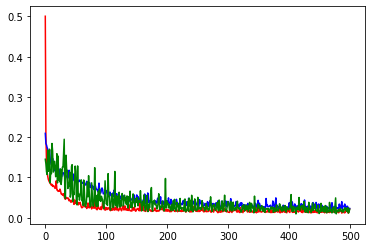

In [0]:
plt.plot(history1.history['val_loss'], 'r', history2.history['val_loss'], 'b', 
history3.history['val_loss'], 'g')

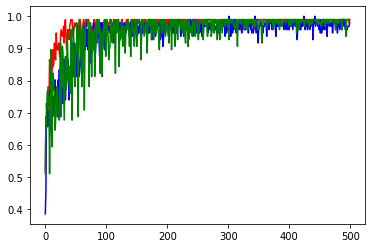

In [0]:
plt.plot(history1.history['acc'], 'r', history2.history['acc'], 'b', 
history3.history['acc'], 'g')

# Zadanie 2



In [0]:

data_linkedin = pd.read_csv(io.StringIO(uploaded['dane_linkedin_header.csv'].decode('utf-8')), delimiter=';')
data_linkedin = pd.DataFrame(data_linkedin)
values = list(dataset.columns.values)
data_linkedin.head()

,connections,certificates,experience,workplaces,education,years_in_company,summary,skills,languages
0,500,0,14.0,4,3,3.50,1,46,2
1,89,1,2.5,1,3,2.50,1,16,3
2,250,0,9.0,6,3,1.50,0,20,4
3,169,9,9.0,3,3,3.00,1,9,3
4,446,0,3.0,4,1,0.75,0,11,1


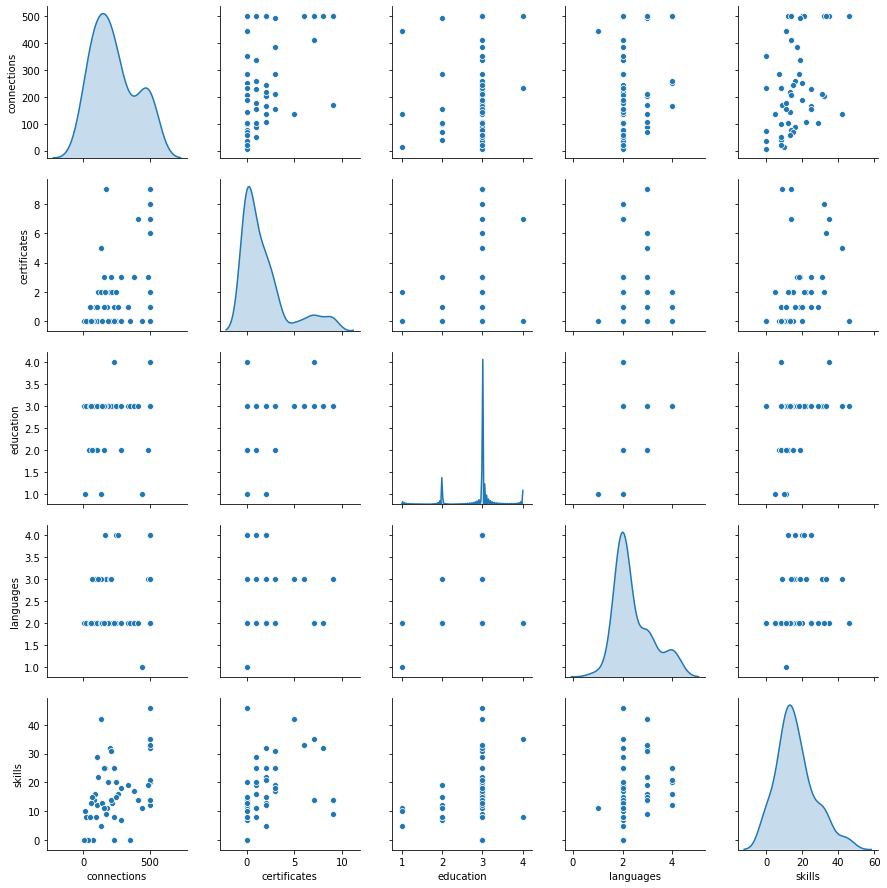

In [0]:
train_dataset = data_linkedin.sample(frac=0.8,random_state=0)
test_dataset = data_linkedin.drop(train_dataset.index)

sns.pairplot(data_linkedin[["connections", "certificates", "education", "languages", "skills"]], diag_kind="kde")



In [0]:
normed_train_data = train_dataset[["connections", "certificates", "education", "languages", "skills"]]
train_labels = train_dataset['workplaces']


normed_test_data = test_dataset[["connections", "certificates", "education", "languages", "skills"]]
test_labels =  test_dataset['workplaces']

In [0]:
model1 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(normed_train_data.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

model1.compile(loss='mse',
                optimizer=tf.keras.optimizers.RMSprop(0.001),
                metrics=['accuracy', 'mse'])
  
model2 = keras.Sequential([
    layers.Dense(128, activation='sigmoid', input_shape=[len(normed_train_data.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

model2.compile(loss='mse',
                optimizer=tf.keras.optimizers.RMSprop(0.001),
                metrics=['accuracy', 'mse'])
  
model3 = keras.Sequential([
    layers.Dense(256, activation='selu', input_shape=[len(normed_train_data.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])
model3.compile(loss='mse',
                optimizer=tf.keras.optimizers.RMSprop(0.001),
                metrics=['accuracy', 'mse'])
  

In [0]:
model1.summary()
model2.summary()
model3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                384       
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 65        
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               768       
_________________________________________________________________
dense_31 (Dense)             (None, 64)                8256      
_____________________________

In [0]:
EPOCHS = 500

history1 = model1.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0)

history2 = model2.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0)

history3 = model3.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0)

In [0]:
print('Accuracy for model 1')
modelAcuracy(model1)
print('\nAccuracy for model 2')
modelAcuracy(model2)
print('\nAccuracy for model 3')
modelAcuracy(model3)

Accuracy for model 1
10/10 - 0s - loss: 6.0524 - acc: 0.1000 - mean_squared_error: 6.0524
Test accuracy for model: 0.1

Accuracy for model 2
10/10 - 0s - loss: 4.5319 - acc: 0.1000 - mean_squared_error: 4.5319
Test accuracy for model: 0.1

Accuracy for model 3
10/10 - 0s - loss: 6.7742 - acc: 0.1000 - mean_squared_error: 6.7742
Test accuracy for model: 0.1


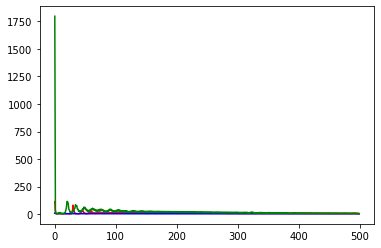

In [0]:
plt.plot(history1.history['val_loss'], 'r', history2.history['val_loss'], 'b', 
history3.history['val_loss'], 'g')

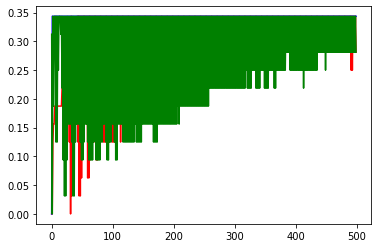

In [0]:
plt.plot(history1.history['acc'], 'r', history2.history['acc'], 'b', 
history3.history['acc'], 'g')